<h3> A Z-Test Example in Python </h3>
<br> &nbsp; Dataset is available at https://www.kaggle.com/goldenoakresearch/us-household-income-stats-geo-locations

In [208]:
# Data Visualiztion
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Data Manipulation
import pandas as pd
import numpy as np

# Directory changes
import os

# Statistical tests
from scipy import stats
import statistics
import scipy


os.chdir('C:\\Users\\...\\Downloads\\us-household-income-stats-geo-locations')

for file in os.listdir(os.getcwd()):
    if '.csv' in file:
        chunks = [chunk for chunk in pd.read_csv(os.getcwd() + '\\{}'.format(file), chunksize = 2500, encoding = 'latin-1')]
        df = pd.concat(chunks, ignore_index = True)

In [153]:
for state in set(df['State_ab'].to_list()):
    for val in df[df['State_ab'].str.match(state)]['County'].value_counts().reset_index()['County'].to_list():
        if val > 10:
            print(state, val)
# It appears the data seems to have a very high bias regarding the amount of cities that were 'polled' for a 
# given State's county... 
# That is, I find it misleading to draw conclusion's regarding a state's behavior as most of that state's behavior is
# dictated by mostly one of the State's counties... 
# For example, in Illinois, Adams County has the most cities in this dataset. Therefore, it may be misleading
# to generalize Illinois' Average Household income as we do not have many (only 19) observations in Chicago's county.
# Nonetheless, we will choose smaller random sample sizes to minimize the amount of undesired influence. 
# We will use a Z Test for larger sample sizes (due to the Central Limit theorem) for n >= 30.
# We will use a T Test for smaller smaple sizes for n < 30.
# This will help us possibly minimize the amount of undesired influence.

MT 111
DE 84
OH 1220
TN 562
VT 71
MI 1102
KS 316
TX 2107
TX 18
FL 1568
AL 463
IA 346
OK 404
NM 196
IL 1282
IL 19
RI 106
WY 55
HI 128
IN 633
MN 545
SD 89
CO 478
PA 1299
PA 12
KY 440
KY 12
AR 284
NV 252
ND 79
MS 283
NH 122
CA 3128
CA 16
CA 11
NJ 835
WA 625
AZ 572
WV 209
MA 648
NE 217
VA 730
GA 751
LA 465
UT 228
MD 537
SC 418
ID 127
PR 354
ME 146
NC 837
DC 63
WI 590
OR 348
CT 346
MO 591
AK 71
NY 2039
NY 15
NY 12


In [154]:
# We begin by comparing the mean Household incomes for Wisconsin and Michigan.
# We generate an array containing the mean Household income values for Wisconsin.
wisco_mvals = df[(df['State_Name'].str.contains('Wisco')) & (df['Mean'] != 0) ]['Mean']

# One condition of the Z Test is to have a Normal Distribution (Due to the Central Limit Theorem
# we can sometimes get away with this...).
fig = go.Figure(data=[go.Histogram(x=wisco_mvals)])

fig.update_layout(
    title_text='Wisconsin Mean Household Income', 
    xaxis_title_text='Household Income', 
    yaxis_title_text='Count', 
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()

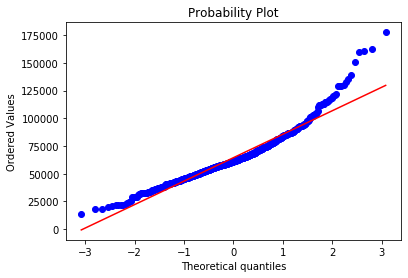

In [163]:
# From here, the distribution appears to be normal...
stats.probplot(wisco_mvals, plot=plt)
plt.show()
# Well, it is fairly Normal...
# We attempt a Log Transformation...
wisco_mvals_log = df[(df['State_Name'].str.contains('Wisco')) & (df['Mean'] != 0)]['Mean'].apply(lambda x: np.log(x))

In [164]:
fig = go.Figure(data=[go.Histogram(x=wisco_mvals_log)])

fig.update_layout(
    title_text='Wisconsin Mean Household Income (Log Transformation)', 
    xaxis_title_text='Household Income',
    yaxis_title_text='Count', 
    bargap=0.2, 
    bargroupgap=0.1 
)

fig.show()

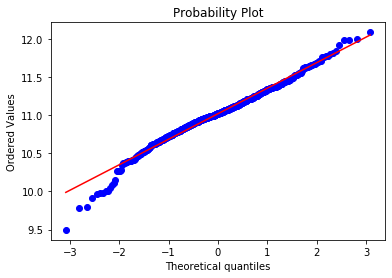

In [165]:
stats.probplot(wisco_mvals_log, plot=plt)
plt.show()
# We prefer the Log Transformation of the Wisconsin Household Mean data as the output appears more linear.
# We could use the Pearson test to check for Normality, but, we choose the Probability Plot for now.

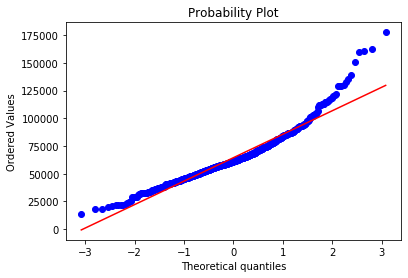

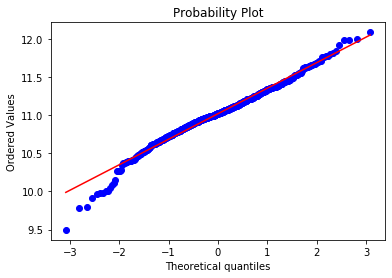

In [166]:
# We write a function that will permit us to complete the above steps...
def view_data(state):
    # Get data...
    mvals = df[(df['State_Name'].str.match(state)) & (df['Mean'] != 0) ]['Mean']
    
    # Print Histogram...
    fig = go.Figure(data=[go.Histogram(x=mvals)])

    fig.update_layout(
        title_text='{} Mean Household Income'.format(state), 
        xaxis_title_text='Household Income', 
        yaxis_title_text='Count', 
        bargap=0.2, 
        bargroupgap=0.1 
        )

    fig.show()
    
    # Print Probability Plot...
    stats.probplot(mvals, plot=plt)
    plt.show()
    
    # Log Transformation...
    mvals_log = df[(df['State_Name'].str.contains(state)) & (df['Mean'] != 0)]['Mean'].apply(lambda x: np.log(x))
    
    # Log Transformation Histogram...
    fig = go.Figure(data=[go.Histogram(x=mvals_log)])

    fig.update_layout(
        title_text='{} Mean Household Income (Log Transformation)'.format(state), 
        xaxis_title_text='Household Income',
        yaxis_title_text='Count', 
        bargap=0.2, 
        bargroupgap=0.1 
    )

    fig.show()
    
    # Log Transforamtion Probability Plot
    stats.probplot(mvals_log, plot=plt)
    plt.show()
    

view_data('Wisconsin')

# It appears we are still in favor of the Log data...
# We store the Log Transformed Wisconsin data into an array...
wisco_log = df[(df['State_Name'].str.contains('Wisconsin')) & (df['Mean'] != 0)]['Mean'].apply(lambda x: np.log(x))
wisco = df[(df['State_Name'].str.contains('Wisconsin')) & (df['Mean'] != 0)]['Mean']

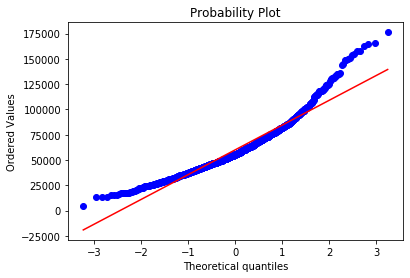

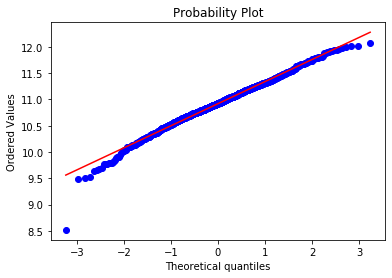

In [167]:
# We now view the Michigan data using the above function...
view_data('Michigan')
# We store the Log Transformed Michigan data into an array...
mich_log = df[(df['State_Name'].str.contains('Michigan')) & (df['Mean'] != 0)]['Mean'].apply(lambda x: np.log(x))
mich = df[(df['State_Name'].str.contains('Michigan')) & (df['Mean'] != 0)]['Mean']

In [128]:
# Before the Hypthosis Tests occur... we view some descriptive statistics on the data.
print('Wisconsin Descriptive Statistics\n', wisco.describe())
print('\nMichigan Descriptive Statistics\n', mich.describe())

# It looks like Michigan has almost double the sample size and has a lower mean...
# The quantile values are similar (based on observation alone), except for the 25% quantile...

Wisconsin Descriptive Statistics
 count       674.000000
mean      64143.255193
std       22299.474184
min           0.000000
25%       50699.500000
50%       61217.500000
75%       74613.500000
max      177678.000000
Name: Mean, dtype: float64

Michigan Descriptive Statistics
 count      1174.000000
mean      59001.124361
std       26372.860594
min           0.000000
25%       42132.000000
50%       54883.500000
75%       72559.750000
max      176259.000000
Name: Mean, dtype: float64


In [338]:
# We begin our Hypothesis Tests...
# We begin with a Z Test choosing a sample size of 100 from the two datasets.
def z_test(states, sample_size):
    values = []
    for state in states:
        data = df[(df['State_Name'].str.match(state)) & (df['Mean'] != 0)]['Mean'].apply(lambda x: np.log(x)).sample(n=sample_size).to_list()
        st_dev = statistics.stdev(data)
        mean = statistics.mean(data)
        values.append([mean, st_dev])

    z_score = (values[0][0] - values[1][0])/((values[0][1]**2 + values[1][1]**2)/sample_size)**.5

    return float(scipy.stats.norm.sf(abs(z_score))*2)

In [361]:
# We now complete 30 Z-Tests on the Data... 
reject = 0
not_reject = 0

for val in range(0,30):
    p_value = z_test(['Wisconsin', 'Michigan'], 100)
    if p_value < 0.05:
        print(val, p_value, 'Reject H0')
        reject += 1
        
    else:
        print('Do not reject H0...')
        not_reject += 1
        
print(reject, not_reject)

# While it may be more beneficial to complete one Z-Test, we deomonstrate a Z-Test can be used in a For-Loop...
# Based on our Hypothesis Test... we do not reject H0.
# That is, there is no evidence that suggests the mean Household Income for residents in Wisconsin
# is different from residents in Michigan.

Do not reject H0...
1 0.0009377498957395913 Reject H0
2 0.0013876415814395783 Reject H0
Do not reject H0...
4 0.00048088692821301126 Reject H0
Do not reject H0...
Do not reject H0...
7 0.003999688015447401 Reject H0
Do not reject H0...
Do not reject H0...
Do not reject H0...
11 0.006962713678773871 Reject H0
12 0.011541076162743684 Reject H0
Do not reject H0...
14 0.0005610920371953913 Reject H0
15 0.0003573508711256608 Reject H0
Do not reject H0...
17 0.03051460482821596 Reject H0
18 0.0014406443172638504 Reject H0
Do not reject H0...
Do not reject H0...
Do not reject H0...
Do not reject H0...
Do not reject H0...
Do not reject H0...
Do not reject H0...
26 0.011077145415019193 Reject H0
Do not reject H0...
Do not reject H0...
Do not reject H0...
11 19


In [371]:
# Let's try another two states and write this as a function...
# In orde to do so, we operate under the assumption that the state in the 'state' list is more 'normal'
# with a Log Transformation...
# In addition, the states variable must contain a list of states as a string.
# sample_size must be an int.
# loop must be an int.
def loop_ztest(states, sample_size, loop):
    reject = 0
    not_reject = 0

    for val in range(0,loop):
        p_value = z_test(states, sample_size)
        if p_value < 0.05:
            print(val, p_value, 'Reject H0')
            reject += 1
        
        else:
            print('Do not reject H0...')
            not_reject += 1
    return print(reject, not_reject)

loop_ztest(['Michigan', 'California'], 50, 50)
# Wow. We reject the null hypothesis.
# That is, there is evidence that suggests the mean Household Income for residents in Michigan is different
# that the mean Household Income for residents in California.

# Feel free to use the For-Loop and compare the differences between two US state with this dataset.
# Be weary as it was breifly observed the States have a high bias for one county within their state.

0 0.00030287617794390933 Reject H0
1 0.0014861833382586035 Reject H0
2 0.0014471261210938988 Reject H0
3 6.230738138992726e-05 Reject H0
4 0.0005660162044285783 Reject H0
5 0.008493109425870343 Reject H0
6 0.03671817685066764 Reject H0
Do not reject H0...
8 0.029302420272540864 Reject H0
9 0.009027579527695484 Reject H0
10 5.266655817387241e-07 Reject H0
11 0.006618897793755234 Reject H0
12 0.001378864952795805 Reject H0
13 4.587537788113829e-05 Reject H0
14 0.0005623875068434228 Reject H0
15 0.00022950186824894077 Reject H0
16 0.005773970290717853 Reject H0
17 6.389504199255541e-05 Reject H0
18 0.0002222030545092705 Reject H0
19 0.0016893469631719163 Reject H0
20 0.0007693667909211582 Reject H0
21 1.7435437837343277e-05 Reject H0
22 0.00012363939961591858 Reject H0
23 0.009770656722150856 Reject H0
24 4.655845225049847e-06 Reject H0
25 0.00036770578406434016 Reject H0
26 0.01093172545498928 Reject H0
27 6.383147778903218e-07 Reject H0
28 9.232467867552553e-05 Reject H0
Do not reject H

In [372]:
loop_ztest(['Michigan', 'New York'], 50, 25)

0 0.04457177482337667 Reject H0
Do not reject H0...
2 0.024332060379847382 Reject H0
3 0.000649095759465057 Reject H0
4 0.003927488436876986 Reject H0
5 0.005168984969454116 Reject H0
6 0.001683959807637225 Reject H0
Do not reject H0...
Do not reject H0...
9 0.0016718444222632405 Reject H0
10 0.010908125734798555 Reject H0
Do not reject H0...
12 0.00015936710610512763 Reject H0
13 0.010855728386309176 Reject H0
14 0.0031195112961274413 Reject H0
15 0.013463869605926854 Reject H0
16 0.017229776089630236 Reject H0
17 0.0001424921148509974 Reject H0
18 0.03016475971325212 Reject H0
19 2.2432577233916022e-06 Reject H0
20 0.0032854696116696156 Reject H0
Do not reject H0...
22 0.002326061269880354 Reject H0
23 0.000732965559443161 Reject H0
Do not reject H0...
19 6


In [373]:
loop_ztest(['Nevada', 'California'], 75, 10)

Do not reject H0...
1 0.010381320783086092 Reject H0
Do not reject H0...
Do not reject H0...
4 0.00035419160975532334 Reject H0
Do not reject H0...
6 0.04598976737431318 Reject H0
7 0.022109217856435003 Reject H0
8 0.001211069358491797 Reject H0
9 2.7741468758531745e-07 Reject H0
6 4


# To Do:
<br><h5> T-Test for Small Sample sizes... due to large county bias.</h5></br>